In [49]:
import numpy as np
import pandas as pd
import lifelines as ll
import matplotlib.pyplot as plt
from lifelines import AalenAdditiveFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines.utils import k_fold_cross_validation
%matplotlib inline

In [50]:
TENURES = pd.read_csv('bytenure.csv')

In [51]:
TENURES = TENURES[TENURES.ending != 'interim only']

In [52]:
TENURES.head()

,slug,coach,coach_id,ending,total_games,total_wins,total_losses,start_rating,end_rating,improvement,top,bottom,middle,last_improvement
0,krugelo99c|00|02|ATL,Lon Kruger,krugelo99c,fired,191.0,69.0,122.0,1354.0496,1424.825000,70.775400,1498.4465,1323.606100,1378.745700,-12.186400
1,stottte99c|02|04|ATL,Terry Stotts,stottte99c,fired,137.0,52.0,85.0,1431.2126,1404.524900,-26.687700,1454.6630,1351.422900,1405.307300,-45.435100
2,woodsmi01c|04|10|ATL,Mike Woodson,woodsmi01c,fired,493.0,206.0,287.0,1416.4968,1625.673800,209.177000,1625.6738,1201.651600,1411.411200,113.429300
3,drewla01c|10|13|ATL,Larry Drew,drewla01c,fired,230.0,128.0,102.0,1577.6614,1481.606100,-96.055300,1608.4310,1434.701400,1535.034800,-51.160300
4,budenmi99c|13|17|ATL,Mike Budenholzer,budenmi99c,NaN,356.0,195.0,161.0,1479.5092,1372.671326,-106.837874,1701.1826,1372.671326,1520.065407,-122.969061


In [53]:
TENURES.ending.value_counts()

fired               114
resigned             26
contract expired      2
traded                2
retired               2
mutual                2
died                  1
Name: ending, dtype: int64

In [54]:
death_event = ['fired', 'contract expired', 'mutual']

In [55]:
TENURES['death'] = (TENURES.ending.isin(death_event) * 1)

In [56]:
TENURES.sample(5)

,slug,coach,coach_id,ending,total_games,total_wins,total_losses,start_rating,end_rating,improvement,top,bottom,middle,last_improvement,death
153,obrieji99c|04|05|PHI,Jim O'Brien,obrieji99c,fired,82.0,43.0,39.0,1434.0282,1500.2852,66.2570,1501.7698,1394.0254,1460.7247,66.2570,1
145,vangust99c|07|12|ORL,Stan Van Gundy,vangust99c,fired,394.0,259.0,135.0,1503.2628,1494.8663,-8.3965,1721.8114,1485.5931,1623.5188,-82.6139,1
96,portete01c|03|05|MIL,Terry Porter,portete01c,fired,164.0,71.0,93.0,1493.1877,1368.4817,-124.7060,1547.3345,1368.4817,1490.8351,-115.8988,1
178,westppa01c|09|12|SAC,Paul Westphal,westppa01c,fired,171.0,51.0,120.0,1334.1420,1419.4415,85.2995,1453.4791,1272.2406,1348.8881,-34.0376,1
215,saundfl99c|09|12|WAS,Flip Saunders,saundfl99c,fired,181.0,51.0,130.0,1387.2084,1306.8265,-80.3819,1414.0051,1265.5120,1352.1587,-53.1907,1


In [57]:
kmf = ll.KaplanMeierFitter()

In [58]:
kmf.fit(TENURES.total_games, event_observed=TENURES.death)

<lifelines.KaplanMeierFitter: fitted with 179 observations, 61 censored>

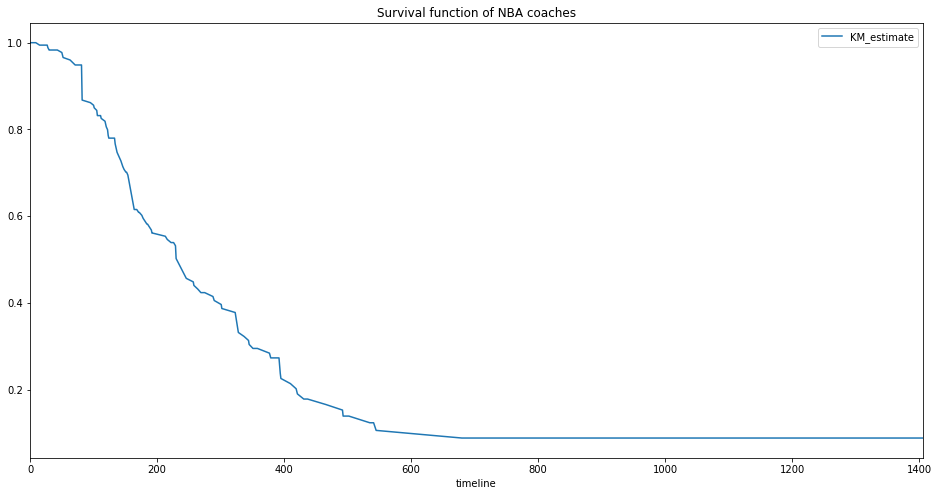

In [59]:
kmf.survival_function_.plot(figsize=(16,8))
plt.title('Survival function of NBA coaches');

Text(0.5,1,u'Survival function of NBA coaches')

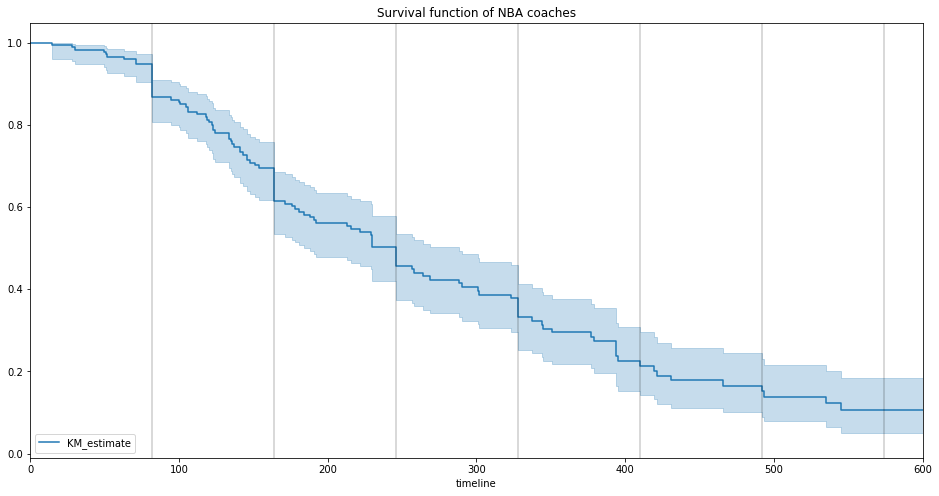

In [60]:
kmf.plot(figsize=(16,8))
[plt.axvline(g, c='black', alpha=0.2) for g in range(82, 82*20, 82)]
plt.xlim(0, 600)
plt.title('Survival function of NBA coaches')

In [61]:
POC = pd.read_csv('../categorized/coach-list-poc.csv')

In [62]:
POC.head()

,coach,coach_id,franchises,poc,note
0,Tyronn Lue,luety01c,CLE,yes,NaN
1,Tyrone Corbin,corbity01c,SAC|UTA,yes,NaN
2,Tony Brown,brownto01c,NJNBRK,yes,NaN
3,Terry Porter,portete01c,PHO|MIL,yes,NaN
4,Sidney Lowe,lowesi01c,VANMEM,yes,NaN


In [63]:
PLAYERS = pd.read_csv('../categorized/coach-list-qualifications.csv')

In [64]:
PLAYERS.head()

,coach,coach_id,franchises,former_nba_player
0,Isiah Thomas,thomais01c,IND|NYK,yes
1,Michael Cooper,coopemi01c,DEN,yes
2,Larry Drew,drewla01c,ATL|MIL,yes
3,Vinny Del Negro,delnevi01c,CHI|LAC,yes
4,Paul Westphal,westppa01c,SAC|SEAOKC,yes


In [65]:
tenures = TENURES.merge(
    POC[['coach','poc']], 
    how='left'
).merge(
    PLAYERS[['coach','former_nba_player']],
    how='left'
)

In [66]:
tenures.poc.isnull().sum()

0

In [67]:
tenures.former_nba_player.isnull().sum()

0

In [68]:
tenures.groupby(['poc','former_nba_player']).size().unstack('poc')

poc,no,yes
former_nba_player,,
no,50,15
yes,60,54


In [69]:
tenures.head()

,slug,coach,coach_id,ending,total_games,total_wins,total_losses,start_rating,end_rating,improvement,top,bottom,middle,last_improvement,death,poc,former_nba_player
0,krugelo99c|00|02|ATL,Lon Kruger,krugelo99c,fired,191.0,69.0,122.0,1354.0496,1424.825000,70.775400,1498.4465,1323.606100,1378.745700,-12.186400,1,no,no
1,stottte99c|02|04|ATL,Terry Stotts,stottte99c,fired,137.0,52.0,85.0,1431.2126,1404.524900,-26.687700,1454.6630,1351.422900,1405.307300,-45.435100,1,no,no
2,woodsmi01c|04|10|ATL,Mike Woodson,woodsmi01c,fired,493.0,206.0,287.0,1416.4968,1625.673800,209.177000,1625.6738,1201.651600,1411.411200,113.429300,1,yes,yes
3,drewla01c|10|13|ATL,Larry Drew,drewla01c,fired,230.0,128.0,102.0,1577.6614,1481.606100,-96.055300,1608.4310,1434.701400,1535.034800,-51.160300,1,yes,yes
4,budenmi99c|13|17|ATL,Mike Budenholzer,budenmi99c,NaN,356.0,195.0,161.0,1479.5092,1372.671326,-106.837874,1701.1826,1372.671326,1520.065407,-122.969061,0,no,no


# POC v. white coaches

(0, 600)

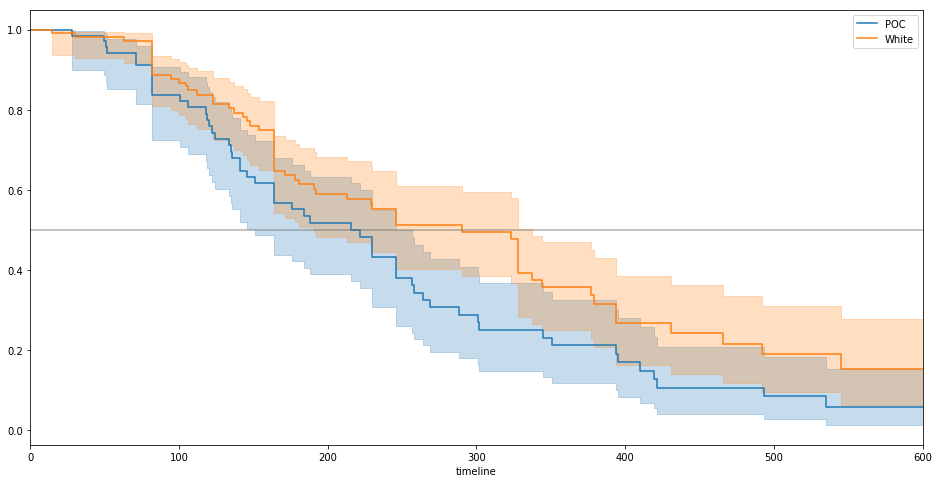

In [70]:
plt.figure(figsize=(16,8))
ax = plt.subplot(111)

ispoc = (tenures['poc'] == 'yes')

kmfpoc = ll.KaplanMeierFitter()
kmfpoc.fit(tenures[ispoc].total_games, event_observed=tenures[ispoc].death, label="POC")
kmfpoc.plot(ax=ax)
pocmed = kmfpoc.median_

kmfwht = ll.KaplanMeierFitter()
kmfwht.fit(tenures[~ispoc].total_games, event_observed=tenures[~ispoc].death, label="White")
kmfwht.plot(ax=ax)
whtmed = kmfwht.median_

plt.axhline(0.5, c='#666666', alpha=0.5)

plt.xlim(0,600)

In [71]:
print "The median survival time for POC coaches was {} games".format(pocmed)
print "The median survival time for white coaches was {} games".format(whtmed)

The median survival time for POC coaches was 222.0 games
The median survival time for white coaches was 290.0 games


In [72]:
results = logrank_test(
    tenures[ispoc].total_games, tenures[~ispoc].total_games,
    event_observed_A=tenures[ispoc].death, event_observed_B=tenures[~ispoc].death
)
results.print_summary()

Results
   df: 1
   alpha: 0.95
   t 0: -1
   test: logrank
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.03192 |              4.603 |      Reject Null    |        True       


# Former NBA players versus non-players 

(0, 600)

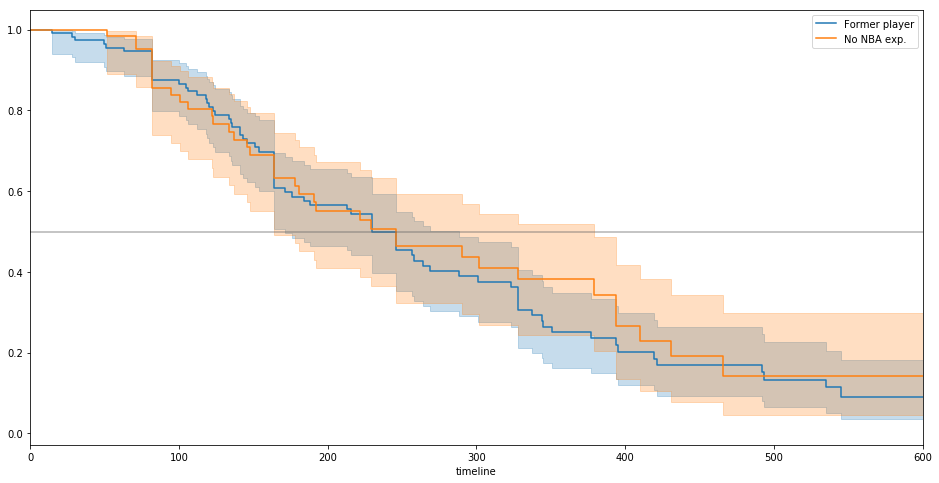

In [73]:
plt.figure(figsize=(16,8))
ax = plt.subplot(111)

former_player = (tenures['former_nba_player'] == 'yes')

kmf.fit(tenures[former_player].total_games, event_observed=tenures[former_player].death, label="Former player")
kmf.plot(ax=ax)
nbamed = kmf.median_
kmf.fit(tenures[~former_player].total_games, event_observed=tenures[~former_player].death, label="No NBA exp.")
kmf.plot(ax=ax)
nonmed = kmf.median_

plt.axhline(0.5, c='#666666', alpha=0.5)

plt.xlim(0,600)

In [74]:
print "The median survival time for former NBA players was {} games".format(nbamed)
print "The median survival time for non-players was {} games".format(nonmed)

The median survival time for former NBA players was 230.0 games
The median survival time for non-players was 246.0 games


In [75]:
results = logrank_test(
    tenures[former_player].total_games, tenures[~former_player].total_games,
    event_observed_A=tenures[former_player].death, event_observed_B=tenures[~former_player].death
)
results.print_summary()

Results
   df: 1
   alpha: 0.95
   t 0: -1
   test: logrank
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.54545 |              0.366 |  Cannot Reject Null |       False       


In [77]:
tenures.head()

,slug,coach,coach_id,ending,total_games,total_wins,total_losses,start_rating,end_rating,improvement,top,bottom,middle,last_improvement,death,poc,former_nba_player
0,krugelo99c|00|02|ATL,Lon Kruger,krugelo99c,fired,191.0,69.0,122.0,1354.0496,1424.825000,70.775400,1498.4465,1323.606100,1378.745700,-12.186400,1,no,no
1,stottte99c|02|04|ATL,Terry Stotts,stottte99c,fired,137.0,52.0,85.0,1431.2126,1404.524900,-26.687700,1454.6630,1351.422900,1405.307300,-45.435100,1,no,no
2,woodsmi01c|04|10|ATL,Mike Woodson,woodsmi01c,fired,493.0,206.0,287.0,1416.4968,1625.673800,209.177000,1625.6738,1201.651600,1411.411200,113.429300,1,yes,yes
3,drewla01c|10|13|ATL,Larry Drew,drewla01c,fired,230.0,128.0,102.0,1577.6614,1481.606100,-96.055300,1608.4310,1434.701400,1535.034800,-51.160300,1,yes,yes
4,budenmi99c|13|17|ATL,Mike Budenholzer,budenmi99c,NaN,356.0,195.0,161.0,1479.5092,1372.671326,-106.837874,1701.1826,1372.671326,1520.065407,-122.969061,0,no,no


In [85]:
regdata = tenures\
.set_index(['slug','coach','coach_id','ending'])\
.drop(['total_losses','improvement'], axis=1)

regdata['poc'] = (regdata.poc == "yes") * 1
regdata['former_nba_player'] = (regdata.former_nba_player == "yes") * 1

In [86]:
regdata.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 179 entries, (krugelo99c|00|02|ATL, Lon Kruger, krugelo99c, fired) to (brooksc01c|16|17|WAS, Scott Brooks, brooksc01c, nan)
Data columns (total 11 columns):
total_games          179 non-null float64
total_wins           179 non-null float64
start_rating         179 non-null float64
end_rating           179 non-null float64
top                  179 non-null float64
bottom               179 non-null float64
middle               179 non-null float64
last_improvement     179 non-null float64
death                179 non-null int64
poc                  179 non-null int64
former_nba_player    179 non-null int64
dtypes: float64(8), int64(3)
memory usage: 19.5+ KB


## Model 1: Everything

In [87]:
cph = CoxPHFitter(alpha=0.95)
cph.fit(
    regdata,
    duration_col='total_games',
    event_col='death'
)

<lifelines.CoxPHFitter: fitted with 179 observations, 61 censored>

In [88]:
cph.print_summary()

n=179, number of events=118

                     coef  exp(coef)  se(coef)        z      p  lower 0.95  upper 0.95     
total_wins        -0.0787     0.9244    0.0073 -10.8384 0.0000     -0.0929     -0.0644  ***
start_rating      -0.0049     0.9951    0.0021  -2.3720 0.0177     -0.0090     -0.0009    *
end_rating        -0.0008     0.9992    0.0029  -0.2691 0.7879     -0.0064      0.0048     
top               -0.0050     0.9950    0.0043  -1.1538 0.2486     -0.0135      0.0035     
bottom             0.0151     1.0152    0.0037   4.0503 0.0001      0.0078      0.0223  ***
middle             0.0130     1.0131    0.0051   2.5541 0.0106      0.0030      0.0229    *
last_improvement  -0.0041     0.9959    0.0028  -1.4562 0.1453     -0.0095      0.0014     
poc                0.3232     1.3815    0.2157   1.4984 0.1340     -0.0996      0.7460     
former_nba_player -0.0974     0.9072    0.2234  -0.4362 0.6627     -0.5354      0.3405     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.0

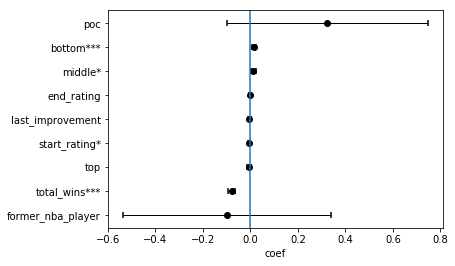

In [89]:
cph.plot()
plt.axvline(0)

In [108]:
def do_k_fold(data):
    scores = k_fold_cross_validation(cph, data, 'total_games', event_col='death',)
    print scores
    print np.mean(scores)
    print np.std(scores)
    print 'interval ({}, {})'.format(
        round((np.mean(scores) - np.std(scores)) * 100, 2),
        round((np.mean(scores) + np.std(scores)) * 100, 2),
    )

In [109]:
do_k_fold(regdata)

[0.97442455242966752, 0.9128205128205128, 0.94771241830065356, 0.94347826086956521, 0.96335078534031415]
0.948357305952
0.0209350920235
interval (92.74, 96.93)


##  Model 2: No weak shit

In [114]:
regdata2 = regdata.drop(['top','end_rating','former_nba_player'], axis=1)

In [115]:
cph2 = CoxPHFitter(alpha=0.95)
cph2.fit(
    regdata2,
    duration_col='total_games',
    event_col='death'
)

<lifelines.CoxPHFitter: fitted with 179 observations, 61 censored>

In [116]:
cph2.print_summary()

n=179, number of events=118

                    coef  exp(coef)  se(coef)        z      p  lower 0.95  upper 0.95     
total_wins       -0.0796     0.9234    0.0071 -11.1551 0.0000     -0.0936     -0.0656  ***
start_rating     -0.0061     0.9939    0.0017  -3.5607 0.0004     -0.0095     -0.0028  ***
bottom            0.0160     1.0161    0.0035   4.6161 0.0000      0.0092      0.0228  ***
middle            0.0080     1.0080    0.0036   2.2266 0.0260      0.0010      0.0151    *
last_improvement -0.0051     0.9949    0.0017  -3.0033 0.0027     -0.0084     -0.0018   **
poc               0.3126     1.3669    0.2034   1.5367 0.1244     -0.0862      0.7113     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.948


In [117]:
do_k_fold(regdata2)

[0.95588235294117652, 0.95454545454545459, 0.96330275229357798, 0.94088669950738912, 0.93817204301075274]
0.95055786046
0.00952494853193
interval (94.1, 96.01)


### Model 3: No POC

In [121]:
regdata3 = regdata2.drop(['poc'], axis=1)

In [122]:
cph3 = CoxPHFitter(alpha=0.95)
cph3.fit(
    regdata3,
    duration_col='total_games',
    event_col='death'
)

<lifelines.CoxPHFitter: fitted with 179 observations, 61 censored>

In [123]:
cph3.print_summary()

n=179, number of events=118

                    coef  exp(coef)  se(coef)        z      p  lower 0.95  upper 0.95     
total_wins       -0.0796     0.9235    0.0071 -11.1672 0.0000     -0.0936     -0.0657  ***
start_rating     -0.0058     0.9942    0.0017  -3.4016 0.0007     -0.0091     -0.0025  ***
bottom            0.0156     1.0157    0.0034   4.5471 0.0000      0.0089      0.0223  ***
middle            0.0079     1.0079    0.0036   2.2009 0.0277      0.0009      0.0149    *
last_improvement -0.0053     0.9947    0.0017  -3.1787 0.0015     -0.0086     -0.0020   **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.949


In [125]:
do_k_fold(regdata3)

[0.94299287410926369, 0.96304849884526555, 0.96560846560846558, 0.95515695067264572, 0.94306930693069302]
0.953975219233
0.0095770991528
interval (94.44, 96.36)


##  Predictions

In [135]:
regdata2['expectation'] = cph2.predict_expectation(regdata2)

In [136]:
current = regdata2.reset_index()
current = current[current.ending.isnull()]

In [137]:
current

,slug,coach,coach_id,ending,total_games,total_wins,start_rating,bottom,middle,last_improvement,death,poc,expectation
4,budenmi99c|13|17|ATL,Mike Budenholzer,budenmi99c,NaN,356.0,195.0,1479.509200,1372.671326,1520.065407,-122.969061,0,0,372.994899
8,stevebr99c|13|17|BOS,Brad Stevens,stevebr99c,NaN,358.0,190.0,1479.785000,1324.332300,1527.202280,80.072362,0,0,396.024392
14,cliffst99c|13|17|CHARBH,Steve Clifford,cliffst99c,NaN,355.0,170.0,1349.502100,1346.324500,1478.618800,-17.843360,0,0,340.148245
20,hoibefr99c|15|17|CHI,Fred Hoiberg,hoibefr99c,NaN,191.0,90.0,1573.944108,1368.270107,1484.867348,-64.587167,0,0,208.772693
28,luety01c|16|17|CLE,Tyronn Lue,luety01c,NaN,152.0,99.0,1644.545310,1536.763726,1648.542652,-13.002896,0,1,136.741380
31,carliri01c|08|17|DAL,Rick Carlisle,carliri01c,NaN,751.0,421.0,1550.883300,1379.847656,1560.639600,12.026533,0,0,1304.594105
36,malonmi99c|15|17|DEN,Mike Malone,malonmi99c,NaN,192.0,88.0,1477.810964,1404.078561,1454.997601,-0.183979,0,0,189.865831
45,vangust99c|14|17|DET,Stan Van Gundy,vangust99c,NaN,274.0,128.0,1384.635600,1292.570600,1487.122571,18.817807,0,0,291.788582
51,kerrst01c|14|17|GSW,Steve Kerr,kerrst01c,NaN,275.0,230.0,1602.863300,1602.863300,1758.765515,25.293386,0,0,345.232211
56,dantomi01c|16|17|HOU,Mike D'Antoni,dantomi01c,NaN,108.0,77.0,1517.278426,1517.278426,1620.394051,104.260821,0,0,115.816982
